In [1]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%load_ext line_profiler
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False 

# 1. Imports

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import rioxarray as rxr
import geopandas as gpd

import pylandstats as pls

from src.models.geograph import GeoGraph
from src.data_loading.rasterio_utils import polygonise
from src.constants import GWS_DATA_DIR, ESA_LANDCOVER_DIR, UTM35N

# Parse geotif landcover data
chernobyl_path = lambda year: GWS_DATA_DIR / "esa_cci_rois" / f"esa_cci_{year}_chernobyl.tif" 

# Parse ROIS
rois = gpd.read_file(GWS_DATA_DIR / "chernobyl_exclusion_zone_v1.geojson")
cez = rois[rois["name"] == "Chernobyl Exclusion Zone"]

/home/users/svm/Code/gtc-biodiversity/env/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# 2. Loading Chernobyl Landcover data (ESA CCI)

For this demonstration we will use the ESA CCI landcover dataset as an example to illustrate how
geographs enable us to reproduce the same metrics that traditional fragmentation software (pylandstats, fragstats)
produce.

In this demo we will look specifically at the Chernobyl exclusion zone, so we reproject the satellite data to the right coordinate
system (UTM35N) and clip to the CEZ region of interest).

In [3]:
def clip_and_reproject(xrdata, clip_geometry=None, to_crs=UTM35N, x_res=300, y_res=300):
    
    if clip_geometry is not None:
        clipped_data = xrdata.rio.clip(clip_geometry)
    else:
        clipped_data = xrdata
        
    if to_crs is not None:
        reprojected_data = clipped_data.rio.reproject(to_crs, resolution=(x_res, y_res))
    else:
        reprojected_data = clipped_data
    
    return reprojected_data

In [4]:
# Loading raster data
years = range(2000, 2015)

rasters = {year: clip_and_reproject(rxr.open_rasterio(chernobyl_path(year)), 
                                    clip_geometry=cez.geometry) 
           for year in years}

In [5]:
%%time
# Loading raster data into geographs
graphs = {year: GeoGraph(data=rasters[year].data, 
                         transform=rasters[year].rio.transform(), 
                         crs=UTM35N, 
                         connectivity=8)
          for year in years}

Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1925/1925 [00:05<00:00, 351.25it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1925/1925 [00:00<00:00, 80722.59it/s]


Graph successfully loaded with 1925 nodes and 5162 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1932/1932 [00:05<00:00, 365.34it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1932/1932 [00:00<00:00, 79871.82it/s]


Graph successfully loaded with 1932 nodes and 5168 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1930/1930 [00:05<00:00, 365.15it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1930/1930 [00:00<00:00, 79523.42it/s]


Graph successfully loaded with 1930 nodes and 5146 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1937/1937 [00:07<00:00, 257.79it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1937/1937 [00:00<00:00, 82189.67it/s]


Graph successfully loaded with 1937 nodes and 5153 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1954/1954 [00:08<00:00, 226.15it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1954/1954 [00:00<00:00, 81434.70it/s]


Graph successfully loaded with 1954 nodes and 5195 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1961/1961 [00:08<00:00, 225.37it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1961/1961 [00:00<00:00, 81900.59it/s]


Graph successfully loaded with 1961 nodes and 5215 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 2005/2005 [00:09<00:00, 213.76it/s]
Step 2 of 2: Adding edges: 100%|██████████| 2005/2005 [00:00<00:00, 83780.78it/s]


Graph successfully loaded with 2005 nodes and 5362 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1997/1997 [00:09<00:00, 219.80it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1997/1997 [00:00<00:00, 82138.02it/s]


Graph successfully loaded with 1997 nodes and 5389 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1993/1993 [00:09<00:00, 218.45it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1993/1993 [00:00<00:00, 15035.29it/s]


Graph successfully loaded with 1993 nodes and 5364 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1995/1995 [00:09<00:00, 206.80it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1995/1995 [00:00<00:00, 82675.17it/s]


Graph successfully loaded with 1995 nodes and 5354 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1989/1989 [00:09<00:00, 210.98it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1989/1989 [00:00<00:00, 78993.19it/s]


Graph successfully loaded with 1989 nodes and 5326 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 2004/2004 [00:09<00:00, 213.91it/s]
Step 2 of 2: Adding edges: 100%|██████████| 2004/2004 [00:00<00:00, 79096.11it/s]


Graph successfully loaded with 2004 nodes and 5377 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 1999/1999 [00:09<00:00, 208.11it/s]
Step 2 of 2: Adding edges: 100%|██████████| 1999/1999 [00:00<00:00, 85106.26it/s]


Graph successfully loaded with 1999 nodes and 5365 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 2004/2004 [00:09<00:00, 213.17it/s]
Step 2 of 2: Adding edges: 100%|██████████| 2004/2004 [00:00<00:00, 84741.96it/s]


Graph successfully loaded with 2004 nodes and 5383 edges.


Step 1 of 2: Creating nodes and finding neighbours: 100%|██████████| 2000/2000 [00:09<00:00, 209.02it/s]
Step 2 of 2: Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 83586.84it/s]


Graph successfully loaded with 2000 nodes and 5360 edges.
CPU times: user 3min 4s, sys: 1.79 s, total: 3min 6s
Wall time: 3min 6s


In [6]:
# Loading raster data into pylandstats
landscapes = {year: pls.Landscape(rasters[year].data.squeeze(), 
                                  res=(300,300) , 
                                  nodata=0) 
              for year in years}

# 3. Metrics calculation

In [7]:
from src.models.geotimeline import GeoGraphTimeline

In [116]:
for graph in graphs.values():
    no_data_nodes = graph.df[graph.df["class_label"] == 0].index
    graph._remove_nodes(no_data_nodes)

In [117]:
graph_timestack = GeoGraphTimeline(graphs)

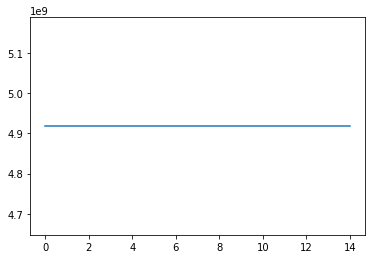

In [118]:
plt.plot(graph_timestack.get_metric("total_area"))

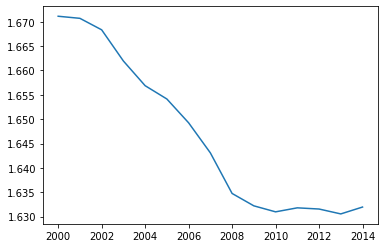

In [119]:
plt.plot(graph_timestack.times, graph_timestack.get_metric("shannon_diversity_index"))

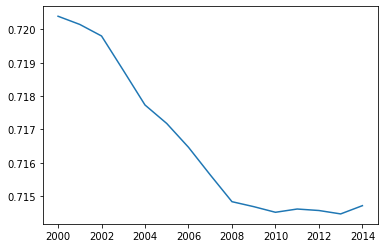

In [120]:
plt.plot(graph_timestack.times, graph_timestack.get_metric("simpson_diversity_index"))

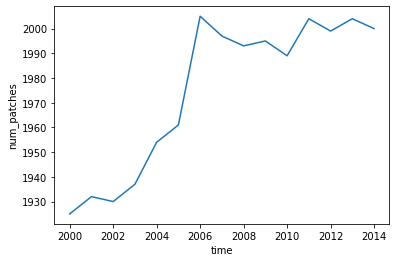

In [121]:
graph_timestack.get_metric("num_patches").plot()

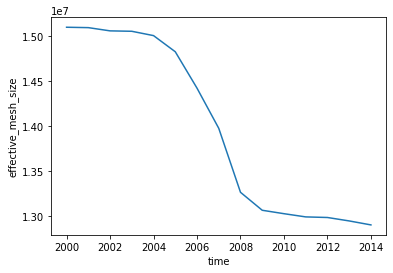

In [122]:
graph_timestack.get_metric("effective_mesh_size", 10).plot()

In [123]:
class_metrics = graph_timestack.get_class_metrics()
class_metrics

<xarray.DataArray (time: 15, class_label: 16, metric: 10)>
array([[[1.46000000e+02, 4.17821918e+06, 6.10020000e+08, ...,
         3.25071309e-03, 2.00720017e+01, 1.51005988e+07],
        [9.40000000e+01, 2.83404255e+05, 2.66400000e+07, ...,
         8.40090090e-03, 1.08400923e+01, 4.76302017e+03],
        [3.31000000e+02, 3.48580060e+05, 1.15380000e+08, ...,
         8.43473739e-03, 2.26504504e+01, 2.00204956e+04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.00000000e+00, 1.80000000e+05, 1.80000000e+05, ...,
         1.00000000e-02, 1.06066017e+00, 6.58785638e+00],
        [4.40000000e+01, 2.60181818e+06, 1.14480000e+08, ...,
         3.53773585e-03, 9.46303010e+00, 8.90230209e+05]],

       [[1.48000000e+02, 4.11506757e+06, 6.09030000e+08, ...,
         3.25107138e-03, 2.00579182e+01, 1.50962425e+07],
        [9.40000000e+01, 2.82446809e+05, 2.65500000e+07, ...,
         8.45197740e-03, 1.08875609e+01, 4.74160963e+03],
        [3.30000000e+02, 3.43090909e+05, 1.13220000e+08, ...,
         8.48436672e-03, 2.25694521e+01, 1.86238700e+04],
...
        [7.00000000e+00, 3.21428571e+05, 2.25000000e+06, ...,
         8.53333333e-03, 3.20000000e+00, 4.56209055e+02],
        [1.00000000e+00, 1.80000000e+05, 1.80000000e+05, ...,
         1.00000000e-02, 1.06066017e+00, 6.58785638e+00],
        [4.50000000e+01, 2.28800000e+06, 1.02960000e+08, ...,
         4.05011655e-03, 1.02740529e+01, 7.54467665e+05]],

       [[1.90000000e+02, 2.75873684e+06, 5.24160000e+08, ...,
         3.38026557e-03, 1.93474070e+01, 1.28988779e+07],
        [8.40000000e+01, 2.59285714e+05, 2.17800000e+07, ...,
         8.67768595e-03, 1.01244835e+01, 3.75507814e+03],
        [2.74000000e+02, 2.61459854e+05, 7.16400000e+07, ...,
         9.32998325e-03, 1.97423416e+01, 8.69597043e+03],
        ...,
        [7.00000000e+00, 3.21428571e+05, 2.25000000e+06, ...,
         8.53333333e-03, 3.20000000e+00, 4.56209055e+02],
        [1.00000000e+00, 1.80000000e+05, 1.80000000e+05, ...,
         1.00000000e-02, 1.06066017e+00, 6.58785638e+00],
        [3.40000000e+01, 3.18176471e+06, 1.08180000e+08, ...,
         3.97115918e-03, 1.03259684e+01, 9.15741683e+05]]])
Coordinates:
  * class_label  (class_label) int64 10 11 30 40 60 61 ... 160 180 190 200 210
  * metric       (metric) object 'num_patches' ... 'effective_mesh_size'
  * time         (time) int64 2000 2001 2002 2003 2004 ... 2011 2012 2013 2014

In [124]:
class_metrics.loc[2000, : , "total_area"]

<xarray.DataArray (class_label: 16)>
array([6.1002e+08, 2.6640e+07, 1.1538e+08, 1.6812e+08, 1.2060e+08,
       9.0000e+04, 8.5617e+08, 4.3218e+08, 1.2654e+08, 1.2960e+07,
       2.3400e+06, 9.9900e+06, 1.8900e+06,        nan, 1.8000e+05,
       1.1448e+08])
Coordinates:
  * class_label  (class_label) int64 10 11 30 40 60 61 ... 160 180 190 200 210
    metric       <U10 'total_area'
    time         int64 2000

<AxesSubplot:>

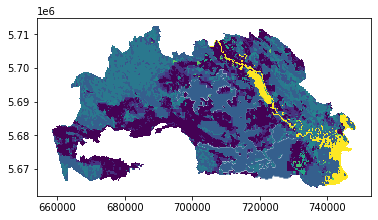

In [125]:
graph_timestack[2000].df.plot("class_label")

<AxesSubplot:>

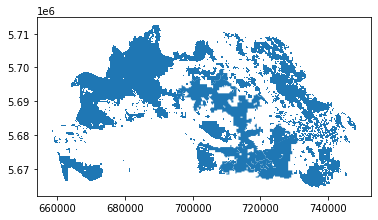

In [134]:
graph_timestack[2000].df[graph_timestack[2000].df["class_label"].isin([50, 60, 70, 80, 90])].plot()

In [135]:
graph_timestack[2000].add_habitat

Object `add_habitat` not found.


In [ ]:
graph_timestack[2000].add_habitat